In [1]:
#pip install voila-vuetify

In [2]:
#pip install bqplot ipyvuetify voila-vuetify

In [3]:
#pip install voila-gridstack

In [4]:
pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [5]:
import ipyvuetify as v
import ipywidgets as widgets
import numpy as np
from bqplot import pyplot as plt 
import bqplot
import os
from datetime import datetime, timedelta, date
#import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt, mpld3

In [6]:
# Set to the folder you are working
folder = r"C:\Users\ellar\Documents\MADE\Living Lab\Python\GPS Data\Binder"
os.chdir(folder)

#Get file
df = pd.read_csv('testdata.csv', delimiter=",", parse_dates=['Date'])

In [7]:
#Create week numbers_
df['Week_Number'] = df['Date'].dt.week
df['Week_Day'] = df['Date'].dt.day
df['Day_Of_Week'] = df['Date'].dt.day_name()

#make day/week/month dataframes
range_today = datetime.now().date()

#last monday
#last_monday = range_today - datetime.timedelta(days=range_today.weekday())
offset = (range_today.weekday() - 0) % 7
last_monday = range_today - timedelta(days=offset)

#Ranges
range_week = range_today + timedelta(days=6)
range_month = last_monday + timedelta(days=34)
range_year = range_today + timedelta(days=364)

#today
today_df = df[(df['Date'] == range_today)]

#this week
week_df = df[(df['Date'] >= range_today) & (df['Date'] <= range_week)]

#this month
month_df = df[(df['Date'] >= range_today) & (df['Date'] <= range_month)]

#This Year
year_df = df[(df['Date'] >= range_today) & (df['Date'] <= range_year)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError wil

In [8]:
### Create month display
### Using matplotlib documentation: 
#https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html

#### TRYING TO CREATE A NP ARRAY of the DATA SO IT CAN FIT IN SIMPLE HEATMAP
calendar_Mo = month_df.loc[df["Day_Of_Week"] == 'Monday']
calendar_Mo
calendar_Mo.reset_index(drop=True, inplace=True)

calendar_Tu = month_df.loc[df["Day_Of_Week"] == 'Tuesday']
calendar_Tu.reset_index(drop=True, inplace=True)

calendar_We = month_df.loc[df["Day_Of_Week"] == 'Wednesday']
calendar_We.reset_index(drop=True, inplace=True)

calendar_Th = month_df.loc[df["Day_Of_Week"] == 'Thursday']
calendar_Th.reset_index(drop=True, inplace=True)

calendar_Fr = month_df.loc[df["Day_Of_Week"] == 'Friday']
calendar_Fr.reset_index(drop=True, inplace=True)

calendar_Sa = month_df.loc[df["Day_Of_Week"] == 'Saturday']
calendar_Sa.reset_index(drop=True, inplace=True)

calendar_Su = month_df.loc[df["Day_Of_Week"] == 'Sunday']
calendar_Su.reset_index(drop=True, inplace=True)

######
df_cal = pd.DataFrame(columns=[])

df_cal['Monday'] = calendar_Mo['Total Visitors']
df_cal['Tuesday'] = calendar_Tu['Total Visitors']
df_cal['Wednesday'] = calendar_We['Total Visitors']
df_cal['Thurs|day'] = calendar_Th['Total Visitors']
df_cal['Friday'] = calendar_Fr['Total Visitors']
df_cal['Saturday'] = calendar_Sa['Total Visitors']
df_cal['Sunday'] = calendar_Su['Total Visitors']

######
weeknumber = date.today().isocalendar()[1]
weeknumber

#####
Cal = df_cal.values

In [9]:
#Create a heatmap that visualizes a month of predictions

weeks = [weeknumber, weeknumber + 1 , weeknumber + 2, weeknumber + 3,]
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:1d}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

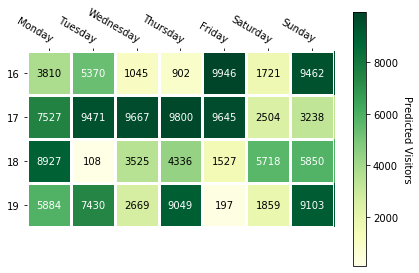

In [10]:
fig, ax = plt.subplots()

im, cbar = heatmap(Cal, weeks, days, ax=ax,
                   cmap="YlGn", cbarlabel="Predicted Visitors")
texts = annotate_heatmap(im, valfmt="{x:1d}")

fig.tight_layout()
#plt.show()

# MPLD3 was tried to save the heatmap to html, but that does not seem to work. 
#mpld3.save_html(fig, "C:\\Users\\ellar\\Documents\\MADE\\Living Lab\\Python\\GPS Data\\Binder\\figure1.html")

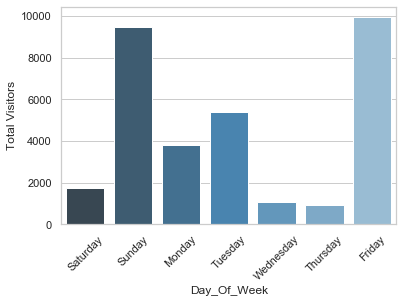

In [11]:
#### Create Week plot
fig2 = plt.figure()
sns.set(style="whitegrid")
ax = sns.barplot(x="Day_Of_Week", y = "Total Visitors", data = week_df, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
barlabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')

#I used the following code to create a html file from the figure
mpld3.save_html(fig2, "C:\\Users\\ellar\\Documents\\MADE\\Living Lab\\Python\\GPS Data\\Binder\\figure2.html")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


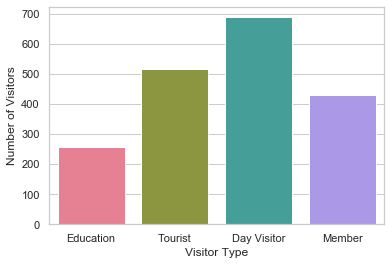

In [12]:
#Show expected number of different type of visitors

#dropping the date column
df_temporary = df[(df['Date'] == range_today)] 
df_temporary.drop(['Date','Week_Number','Week_Day','Total Visitors', 'Day_Of_Week'], axis=1, inplace=True)

#Transpose the dataframe so the information is shown in the right way
df_vistypes = pd.melt(df_temporary, var_name='Visitor Type',value_name='Number of Visitors')

#Create the plot
fig = plt.figure()
sns.set(style="whitegrid")
ax2 = sns.barplot(x="Visitor Type", y = "Number of Visitors", data = df_vistypes, palette="husl")

#I used the following code to create a html file from the figure
mpld3.save_html(fig, "C:\\Users\\ellar\\Documents\\MADE\\Living Lab\\Python\\GPS Data\\Binder\\figure1.html")

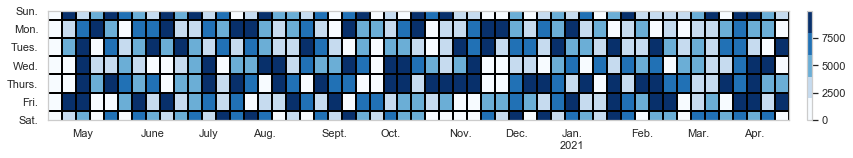

In [13]:
#Create expectations for the year, this graph is maybe not so relevant.

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    cmap = mpl.cm.get_cmap('Blues', 5)
    plt.set_cmap(cmap)
    #plt.clim(-0.5, 4.5)


    
    return ax

def plotHeatMap(csvInput, startDate, endDate, nrOfInterest='Total Visitors'):
    for idx,date in enumerate(csvInput['Date']):
        if startDate==date:
            idxStart = idx
        if endDate==date:
            idxEnd = idx

    data = csvInput[nrOfInterest][idxStart:idxEnd];
    data.index = pd.DatetimeIndex(csvInput['Date'][idxStart:idxEnd])
    
    # Create the figure. For the aspect ratio, one year is 7 days by 53 weeks.
    # We widen it further to account for the tick labels and color bar.
    figsize = plt.figaspect(7 / 56)
    fig = plt.figure(figsize=figsize)
    
    # Plot the heatmap with a color bar.
    ax = date_heatmap(data, edgecolor='black')
    plt.colorbar(pad=0.02)
    
    return ax


csvInput = pd.read_csv('testdata.csv', delimiter=",", parse_dates=['Date'])
# =============================================================================
# nrOfInterest = "Total Visitors"
# nrOfInterest = "Education"
# oid
# =============================================================================
startDate = range_today
endDate = range_year

fig3 = plotHeatMap(csvInput,startDate,endDate,"Total Visitors")
#mpld3.save_html(fig3, "C:\\Users\\ellar\\Documents\\MADE\\Living Lab\\Python\\GPS Data\\Binder\\figure2.html")

# Set up Layout - Not Working

In [14]:
#This was an effort to start working with voila/vuetify. Using some of the github documents Maarten Breddels put online
#You can find those here: https://github.com/maartenbreddels/voila-demo
v.Tabs(_metadata={'mount_id': 'content-main'}, children=[
    v.Tab(children=['Tab1']),
    v.Tab(children=['Tab2']),
    v.TabItem(children=[
        v.Layout(row=True, wrap=True, align_center=True, children=[
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                ax2
            ]),
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                ax
            ]),
            v.Flex(xs12=True, xl4=True, children=[
                fig
            ]),
        ])
    ]),
    v.TabItem(children=[
        v.Container(children=['Lorum ipsum'])
    ])
])

TraitError: Element of the 'children' trait of a Flex instance must be a DOMWidget or a unicode string, but a value of <matplotlib.axes._subplots.AxesSubplot object at 0x000001E491645948> <class 'matplotlib.axes._subplots.AxesSubplot'> was specified.

In [ ]:
#This is the way suggested by jakub to creat

import ipywidgets as widgets
from ipywidgets import TwoByTwoLayout
import html

## Setting up widget containers - there are multiple types of containers and you can use all of them to also make interactive elements https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#
## I am using html because in most packages you can render your plot as html

import codecs
value1 = codecs.open("figure1.html", "r", "utf-8").read()

ax1 = widgets.HTML(
    value= value1,
    placeholder='Some HTML',
    description='Some HTML',
)
ax2 = widgets.HTML(
    value="value1",
    placeholder='Some HTML',
    description='Some HTML',
)
ax3 = widgets.HTML(
    value='value1',
    placeholder='Some HTML',
    description='Some HTML',
)
ax4 = widgets.HTML(
    value="4 <b>World</b>",
    placeholder='Some HTML',
    description='Some HTML',
)

## I am setting up layout using GRID. For you it might be better to use App layout https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html#AppLayout

layout = TwoByTwoLayout(top_left=ax1,
               top_right=ax2,
               bottom_left=ax3,
               bottom_right=ax4)

In [ ]:
layout

In [16]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


In [17]:
pipreqs /home/project/location

SyntaxError: invalid syntax (<ipython-input-17-50e1dc93eb82>, line 1)

In [18]:
import ipyvuetify as v
import ipywidgets as widgets
import numpy as np
from bqplot import pyplot as plt 
import bqplot
import os
from datetime import datetime, timedelta, date
#import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt, mpld3

SyntaxError: invalid syntax (<ipython-input-18-55c31c867409>, line 1)

In [19]:
%load_ext watermark

#python, ipython, packages and machine characteristics
%watermark -v -m -p wget,pandas,numpy,datetime,seaborn,matplotlib.pyplot,watermark, ipyvuetify, ipywidgets, bqplot, 

#date
print(" ")
%watermark-u -n -t -z

UsageError: unrecognized arguments: ipyvuetify, ipywidgets, bqplot,


In [20]:
%watermark --iversions

matplotlib 3.1.1
bqplot     0.12.5
pandas     0.25.1
seaborn    0.9.0
mpld3      0.3
ipyvuetify 1.2.2
ipywidgets 7.5.1
numpy      1.16.5

